# Modified IQAE tests

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

from random import sample, seed
from collections import defaultdict

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble
from qiskit.algorithms import amplitude_estimators, EstimationProblem
from qiskit.algorithms import IterativeAmplitudeEstimation as BaseIterativeAmplitudeEstimation

from algorithms import IterativeAmplitudeEstimation, ModifiedIterativeAmplitudeEstimation
from algorithms import NoQuantumIterativeAmplitudeEstimation
from operators import *

In [2]:
# Define the estimation problem and oracle function
def make_problems(n, marked):
    
    def good_state(state):
        bin_marked = [(n-len(bin(s))+2)*'0'+bin(s)[2:] for s in marked]
        return (state in bin_marked)

    problem = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )

    problem2 = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )
    
    return problem, problem2

In [3]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 100

## Compare Modified IQAE to No-Quantum IQAE

In [4]:
# parameters for IQAE

# amplitudes
n = 4
k = 2**n

# epsilons
powers = range(2,7)
epsilons = [(1.0 / (10**power)) for power in powers]

# other
alpha = 0.05
confint_method = 'beta'
verbose = False

Number of trials per amplitude: 100


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

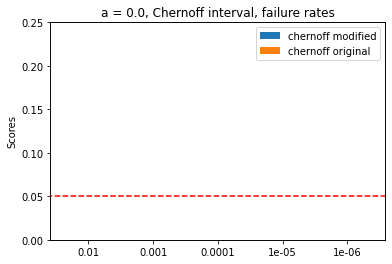

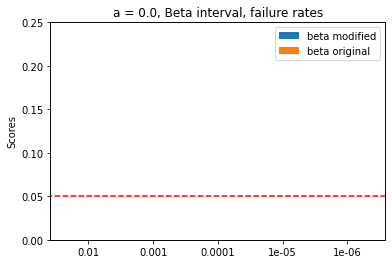

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 1/16 = 0.0625, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 1/16 = 0.0625, eps: 0.0001, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 1/16 = 0.0625, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.13


  0%|          | 0/100 [00:00<?, ?it/s]

a: 1/16 = 0.0625, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

a: 1/16 = 0.0625, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.08


  0%|          | 0/100 [00:00<?, ?it/s]

a: 1/16 = 0.0625, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


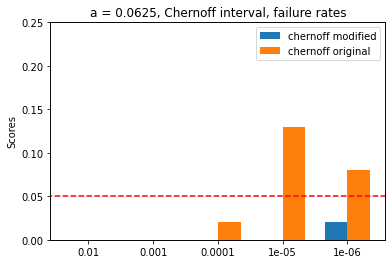

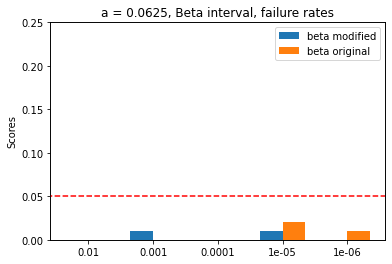

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 2/16 = 0.125, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 2/16 = 0.125, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

a: 2/16 = 0.125, eps: 0.0001, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.03


  0%|          | 0/100 [00:00<?, ?it/s]

a: 2/16 = 0.125, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 2/16 = 0.125, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.0


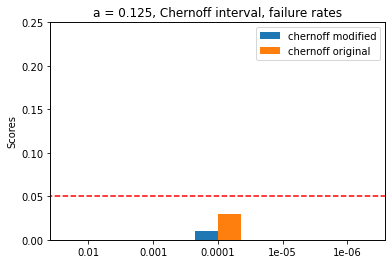

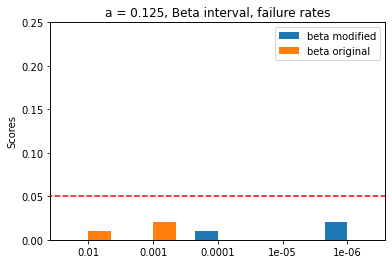

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 3/16 = 0.1875, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 3/16 = 0.1875, eps: 0.001, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

a: 3/16 = 0.1875, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 3/16 = 0.1875, eps: 0.0001, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.08


  0%|          | 0/100 [00:00<?, ?it/s]

a: 3/16 = 0.1875, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

a: 3/16 = 0.1875, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.14


  0%|          | 0/100 [00:00<?, ?it/s]

a: 3/16 = 0.1875, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

a: 3/16 = 0.1875, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.18


  0%|          | 0/100 [00:00<?, ?it/s]

a: 3/16 = 0.1875, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.01


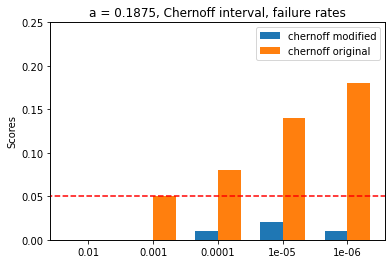

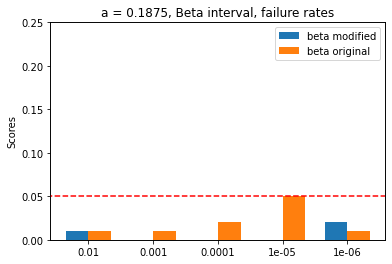

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 4/16 = 0.25, eps: 0.001, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.06


  0%|          | 0/100 [00:00<?, ?it/s]

a: 4/16 = 0.25, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 4/16 = 0.25, eps: 0.0001, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.09


  0%|          | 0/100 [00:00<?, ?it/s]

a: 4/16 = 0.25, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 4/16 = 0.25, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.21


  0%|          | 0/100 [00:00<?, ?it/s]

a: 4/16 = 0.25, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

a: 4/16 = 0.25, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.06
Original IAE failure rate: 0.25


  0%|          | 0/100 [00:00<?, ?it/s]

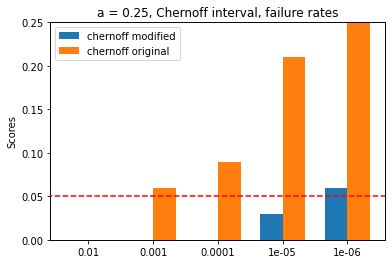

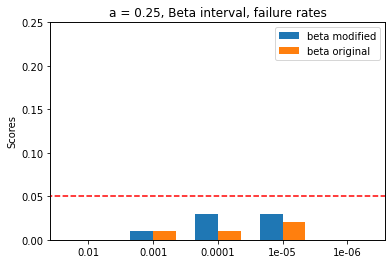

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 5/16 = 0.3125, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.03


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 5/16 = 0.3125, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 5/16 = 0.3125, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 5/16 = 0.3125, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 5/16 = 0.3125, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

a: 5/16 = 0.3125, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


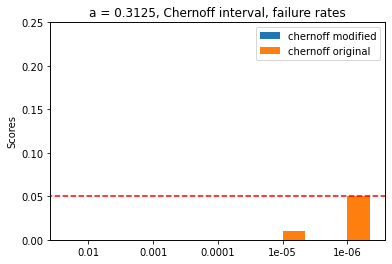

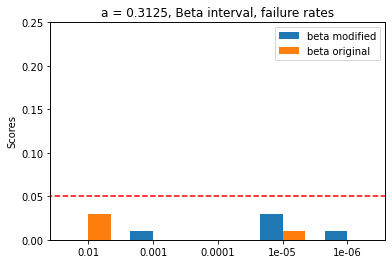

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 6/16 = 0.375, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 6/16 = 0.375, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

a: 6/16 = 0.375, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

a: 6/16 = 0.375, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 6/16 = 0.375, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.01


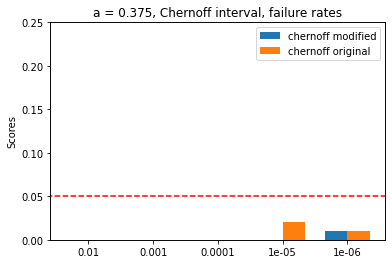

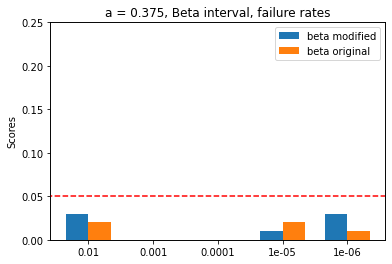

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 7/16 = 0.4375, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 7/16 = 0.4375, eps: 0.001, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 7/16 = 0.4375, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.06
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 7/16 = 0.4375, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 7/16 = 0.4375, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.01


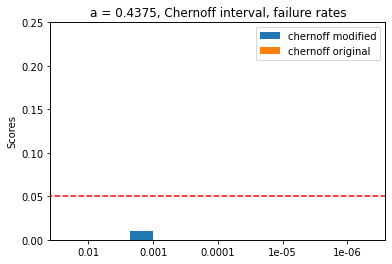

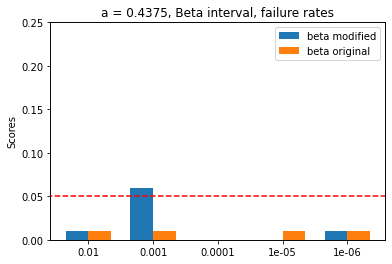

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 8/16 = 0.5, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 8/16 = 0.5, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 8/16 = 0.5, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 8/16 = 0.5, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 8/16 = 0.5, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.01


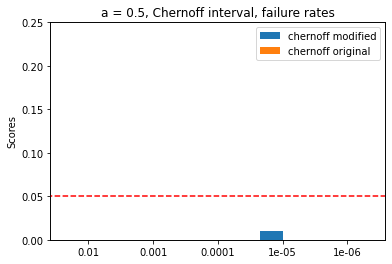

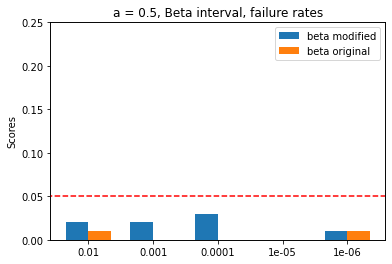

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 9/16 = 0.5625, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 9/16 = 0.5625, eps: 0.001, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 9/16 = 0.5625, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 9/16 = 0.5625, eps: 0.0001, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.11


  0%|          | 0/100 [00:00<?, ?it/s]

a: 9/16 = 0.5625, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 9/16 = 0.5625, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.15


  0%|          | 0/100 [00:00<?, ?it/s]

a: 9/16 = 0.5625, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 9/16 = 0.5625, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.06
Original IAE failure rate: 0.25


  0%|          | 0/100 [00:00<?, ?it/s]

a: 9/16 = 0.5625, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.04
Original IAE failure rate: 0.0


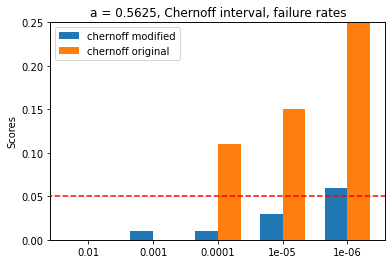

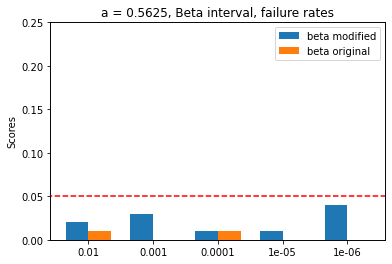

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 10/16 = 0.625, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

a: 10/16 = 0.625, eps: 0.001, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.03


  0%|          | 0/100 [00:00<?, ?it/s]

a: 10/16 = 0.625, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 10/16 = 0.625, eps: 0.0001, CI method: chernoff
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.12


  0%|          | 0/100 [00:00<?, ?it/s]

a: 10/16 = 0.625, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 10/16 = 0.625, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.12


  0%|          | 0/100 [00:00<?, ?it/s]

a: 10/16 = 0.625, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 10/16 = 0.625, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.07
Original IAE failure rate: 0.16


  0%|          | 0/100 [00:00<?, ?it/s]

a: 10/16 = 0.625, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.01


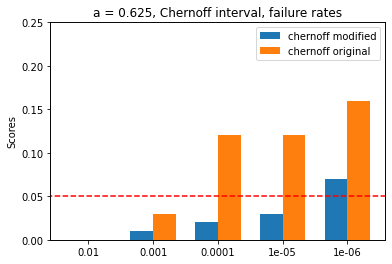

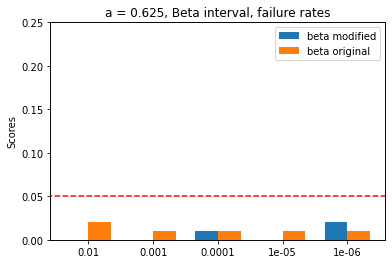

  0%|          | 0/100 [00:00<?, ?it/s]

a: 11/16 = 0.6875, eps: 0.01, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 11/16 = 0.6875, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 11/16 = 0.6875, eps: 0.0001, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 11/16 = 0.6875, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 11/16 = 0.6875, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.06


  0%|          | 0/100 [00:00<?, ?it/s]

a: 11/16 = 0.6875, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.04
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 11/16 = 0.6875, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.06
Original IAE failure rate: 0.08


  0%|          | 0/100 [00:00<?, ?it/s]

a: 11/16 = 0.6875, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.02


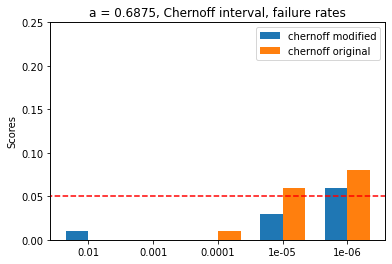

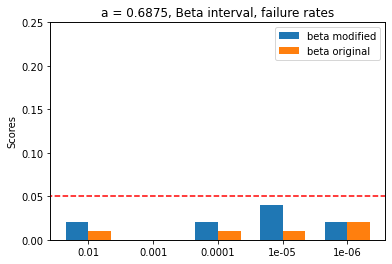

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 12/16 = 0.75, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.04
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 12/16 = 0.75, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 12/16 = 0.75, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 12/16 = 0.75, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 12/16 = 0.75, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.04
Original IAE failure rate: 0.0


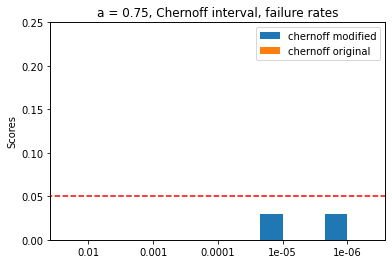

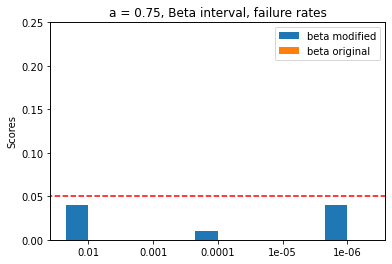

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 13/16 = 0.8125, eps: 0.001, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 13/16 = 0.8125, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 13/16 = 0.8125, eps: 0.0001, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.07


  0%|          | 0/100 [00:00<?, ?it/s]

a: 13/16 = 0.8125, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 13/16 = 0.8125, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.08


  0%|          | 0/100 [00:00<?, ?it/s]

a: 13/16 = 0.8125, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 13/16 = 0.8125, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.08


  0%|          | 0/100 [00:00<?, ?it/s]

a: 13/16 = 0.8125, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.02


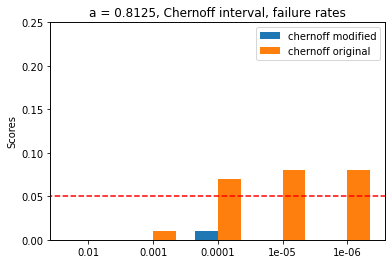

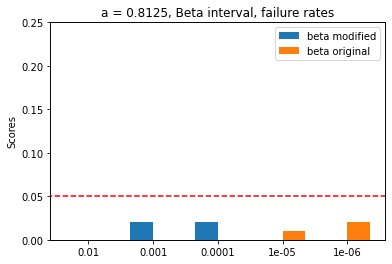

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 14/16 = 0.875, eps: 0.01, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

a: 14/16 = 0.875, eps: 0.001, CI method: chernoff
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 14/16 = 0.875, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.01
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 14/16 = 0.875, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 14/16 = 0.875, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 14/16 = 0.875, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.03


  0%|          | 0/100 [00:00<?, ?it/s]

a: 14/16 = 0.875, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.0


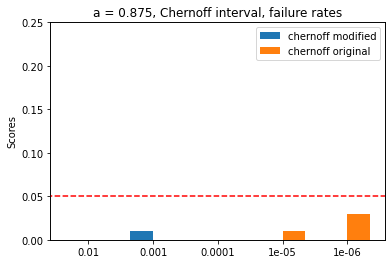

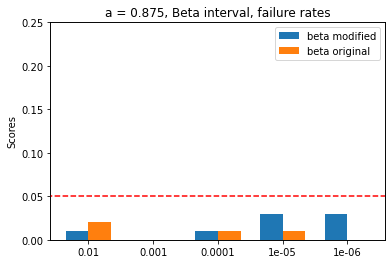

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

a: 15/16 = 0.9375, eps: 0.001, CI method: beta
Modified IAE failure rate: 0.02
Original IAE failure rate: 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

a: 15/16 = 0.9375, eps: 0.0001, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 15/16 = 0.9375, eps: 0.0001, CI method: beta
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 15/16 = 0.9375, eps: 1e-05, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 15/16 = 0.9375, eps: 1e-05, CI method: beta
Modified IAE failure rate: 0.04
Original IAE failure rate: 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

a: 15/16 = 0.9375, eps: 1e-06, CI method: chernoff
Modified IAE failure rate: 0.0
Original IAE failure rate: 0.01


  0%|          | 0/100 [00:00<?, ?it/s]

a: 15/16 = 0.9375, eps: 1e-06, CI method: beta
Modified IAE failure rate: 0.03
Original IAE failure rate: 0.01


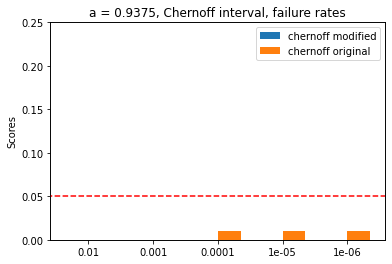

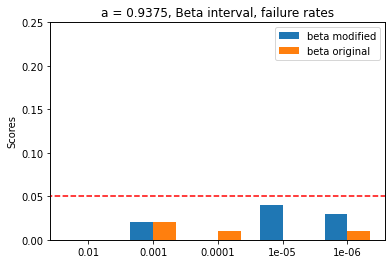

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

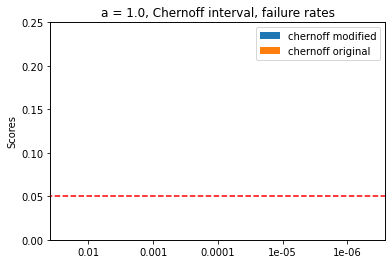

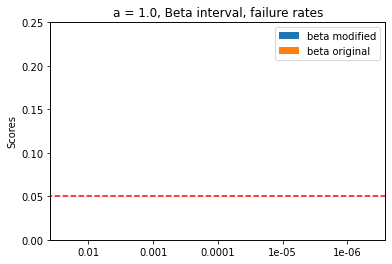

In [6]:
# stats recording
iae_epsilon = []
iae_nshots = []
miae_epsilon = []
miae_nshots = []

exprs = ['Modified IAE', 'Original IAE']

wins = matches = 0

n_trials = 100

print('Number of trials per amplitude:', n_trials)

ki = 0
while ki <= k:
    
    # setup problems with specified N,k
    N = 2**n
    marked = sample(range(N), ki)
    problem, problem2 = make_problems(n, marked)
    
    # execute experiments for each power
    failrate_per_eps = { 'chernoff modified': [],
                         'beta modified': [],
                         'chernoff original': [],
                         'beta original': [] }
    
    for i, epsilon in enumerate(epsilons):
        
        for confint_method in ['chernoff', 'beta']:
            
            miae_fails = iae_fails = 0
            
            for _ in tqdm(range(n_trials), leave=False):
                MIAE = ModifiedIterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                                            alpha=alpha, 
                                                            confint_method=confint_method, 
                                                            quantum_instance=aer_sim)

                IAE = IterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                                            alpha=alpha, 
                                                            confint_method=confint_method, 
                                                            quantum_instance=aer_sim)

                # configure the number of shots this way and pray that it works
                MIAE._quantum_instance._run_config.shots = shots
                IAE._quantum_instance._run_config.shots = shots

                # for recording intermediate algo results
                state = defaultdict(dict)
                state2 = defaultdict(dict)

                miae_result = MIAE.estimate(problem,
                                            state=state,
                                            verbose=verbose)

                iae_result = IAE.estimate(problem2,
                                          state=state2,
                                          verbose=verbose)

                # test miae result
                if not (miae_result.confidence_interval_processed[0] <= ki / N <= miae_result.confidence_interval_processed[1]):
                    miae_fails += 1

                if not (iae_result.confidence_interval_processed[0] <= ki / N <= iae_result.confidence_interval_processed[1]):
                    iae_fails += 1
            
            if miae_fails > 0 or iae_fails > 0:
                print(f'a: {ki}/{N} = {ki/N}, eps: {epsilon}, CI method: {confint_method}')
                print('Modified IAE failure rate:', miae_fails/n_trials)
                print('Original IAE failure rate:', iae_fails/n_trials)
            
            failrate_per_eps[confint_method+' modified'].append(miae_fails/n_trials)
            failrate_per_eps[confint_method+' original'].append(iae_fails/n_trials)
            
    
    for confint_method in ['chernoff', 'beta']:
        plt.figure()

        x = np.arange(len(epsilons))  # the label locations
        width = 0.35  # the width of the bars

        plt.title('errors')
        rects1 = plt.bar(x - width/2, failrate_per_eps[confint_method+' modified'], width)
        rects2 = plt.bar(x + width/2, failrate_per_eps[confint_method+' original'], width)

        # Add some text for labels, title and custom x-axis tick labels, etc.
        plt.ylabel('Scores')
        plt.title((f'a = {ki/N}, {confint_method.title()} interval, failure rates'))
        plt.xticks(x, epsilons)
        plt.ylim(0,0.25)
        
        plt.legend([f'{confint_method} modified', f'{confint_method} original'])
        
        ax = plt.twiny()
        line_xs = np.arange(len(epsilons)+3) - 2
        
        ax.plot(line_xs, [0.05] * len(line_xs), linestyle='--', c='r')
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False,
            labeltop=False ) # labels along the bottom edge are off
        ax.set_xlim(0,5)
        
        plt.show()

    ki += 1